In [1]:
import scipy.io
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import warnings
import cv2
import torchvision.transforms.functional as F
import torch
from PIL import Image
from segm.data.factory import create_dataset

In [26]:
os.environ['DATASET'] = "/home/nelsonni/laviolette/segmenter/ade20k"

In [27]:
dataset_kwargs=dict(
            dataset='ade20k',
            image_size=512,
            crop_size=512,
            batch_size=4,
            normalization='vit',
            split="train",
            num_workers=10,
        )

In [28]:
train_loader = create_dataset(dataset_kwargs)

Use normalization: {'mean': (127.5, 127.5, 127.5), 'std': (127.5, 127.5, 127.5)}


2022-12-29 17:08:10,556 - mmseg - INFO - Loaded 20210 images


In [31]:
b = 0
for batch in train_loader:
    b = batch
    break

In [10]:
mat_file = '/data/ur/bukowy/LaViolette_Data/Prostates/1102/9/large_recon_8_ANOT_o_coded.mat'
o_mat_file = '/data/ur/bukowy/LaViolette_Data/Prostates/1188/12/large_recon_8_seg_w_har_bbc_coded_1layer_combined_clustnumbd_CPSEG_o.mat'
mri_file = '/data/ur/bukowy/LaViolette_Data/Prostates/1102/9/mri_slice_double_T2.nii'

In [47]:
def load_mri(filepath):
    """Loads MRI nii file returns a 2D float 32 array of range [0, 1]"""
    warnings.filterwarnings('ignore')
    mri = nib.load(filepath).get_fdata()
    temp = mri - np.min(mri)
    return (temp / (1 if np.max(temp) == 0 else np.max(temp))).astype(np.float32)

In [58]:
mri = load_mri(mri_file)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [5]:
unmasked_mri = cv2.cvtColor(mri, cv2.COLOR_GRAY2RGB)

In [23]:
im = torch.from_numpy(unmasked_mri)
# im = im.unsqueeze(0)

im = F.normalize(im, 0.5, 0.5)
im1 = im.view(3, 512, 512)

In [17]:
im2 = im.permute(2, 0, 1)

In [21]:
im2.shape

torch.Size([3, 512, 512])

In [7]:
im.max()

tensor(1.)

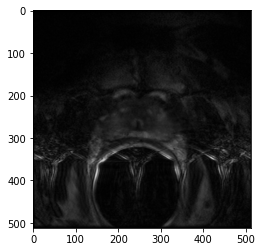

In [24]:
plt.imshow(im)

In [9]:
filename = './ade20k/ade20k/ADEChallengeData2016/images/validation/ADE_val_00000001.jpg'
pil_im = Image.open(filename).copy()
im = F.pil_to_tensor(pil_im).float() / 255
im = F.normalize(im, 0.5, 0.5)

In [47]:
im.min()

tensor(-1.)

In [41]:
im.shape

torch.Size([3, 512, 683])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


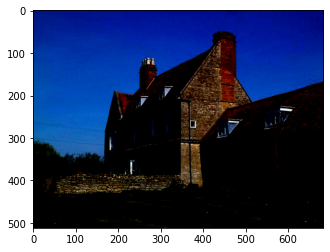

In [10]:
plt.imshow(im.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


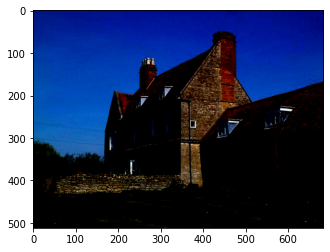

In [42]:
plt.imshow(im.permute(1, 2, 0))

# os.path.exists('/data/ur/bukowy/LaViolette_Data/Prostates/1123/11/large_recon_8_seg_w_har_bbc_coded_1layer_combined_clustnumbd_CPSEG_o.mat')

In [11]:
mat = scipy.io.loadmat(mat_file)
mat1 = scipy.io.loadmat(o_mat_file)

In [39]:
mat1['out'][0][0][0][:,:,:].shape

(512, 512, 29)

In [13]:
mat1['out'].shape

(1, 1)

In [12]:
mat1['out']

array([[(array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..

In [182]:
mat1['out'][0][0][1].shape

(81, 100, 22)

In [149]:
mat1['im_output'][:,:,0].shape

(5184, 6400)

In [150]:
mat = np.array(mat)

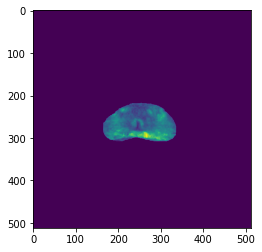

In [215]:
plt.imshow(mri)

<Figure size 432x288 with 0 Axes>

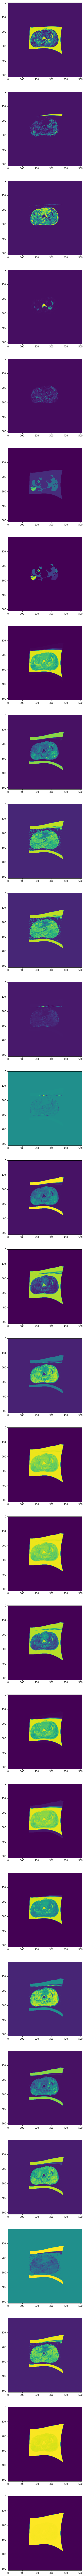

In [48]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(29,1, figsize=(10,200))
for i in range(29):
    axarr[i].imshow(mat1['out'][0][0][0][:,:,i])

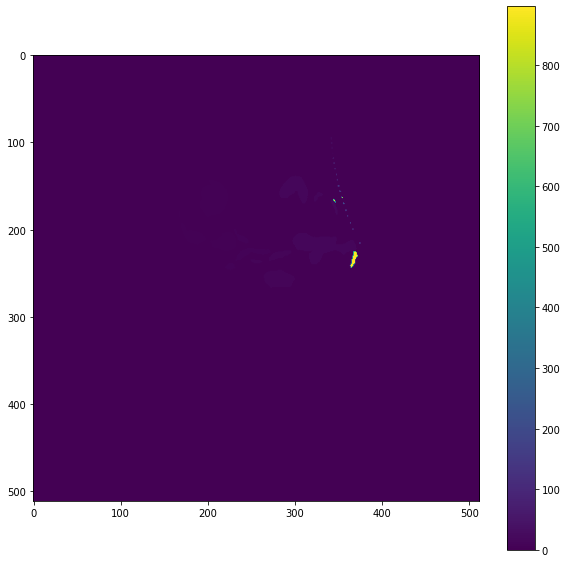

In [103]:
plt.figure(figsize=(10,10))
plt.imshow(mat1['out'][0][0][0][:,:,6])
plt.colorbar()

In [52]:
new = mat1['out'][0][0][0][:,:,6] * [mat1['out'][0][0][0][:,:,6] < 13]
new = new.squeeze()

In [78]:
mat1['out'][0][0][0][:,:,6]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
unique, counts = np.unique(mat1['out'][0][0][0][:,:,6].flatten(), return_counts=True)

print(np.asarray((unique, counts)).T)

[[0.00000e+00 2.55584e+05]
 [1.00000e+00 6.60000e+01]
 [2.00000e+00 6.80000e+01]
 [3.00000e+00 1.23700e+03]
 [4.00000e+00 1.60000e+01]
 [5.00000e+00 3.49000e+02]
 [6.00000e+00 1.00500e+03]
 [7.00000e+00 4.24000e+02]
 [8.00000e+00 7.30000e+01]
 [9.00000e+00 1.08000e+02]
 [1.00000e+01 2.55000e+02]
 [1.10000e+01 4.80000e+01]
 [1.30000e+01 5.65000e+02]
 [1.40000e+01 1.69000e+02]
 [1.50000e+01 6.41000e+02]
 [1.60000e+01 1.30700e+03]
 [1.70000e+01 5.50000e+01]
 [1.80000e+01 5.30000e+01]
 [2.90000e+01 4.00000e+00]
 [3.10000e+01 3.00000e+00]
 [3.20000e+01 1.00000e+00]
 [3.40000e+01 3.00000e+00]
 [4.80000e+01 3.00000e+00]
 [5.70000e+01 4.00000e+00]
 [8.40000e+01 2.00000e+00]
 [9.80000e+01 2.00000e+00]
 [1.12000e+02 2.00000e+00]
 [1.39000e+02 4.00000e+00]
 [1.54000e+02 3.00000e+00]
 [1.68000e+02 2.00000e+00]
 [2.29000e+02 3.00000e+00]
 [2.61000e+02 2.00000e+00]
 [2.77000e+02 1.00000e+00]
 [3.24000e+02 1.00000e+00]
 [3.61000e+02 1.00000e+00]
 [4.63000e+02 1.00000e+00]
 [8.76000e+02 1.00000e+00]
 

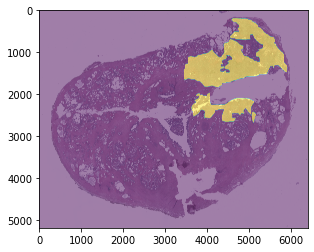

In [160]:
plt.imshow(mat['im_output'][:,:,0])
plt.imshow(plt.imread('/data/ur/bukowy/LaViolette_Data/Prostates/1102/9/large_recon_8.tiff'), alpha=0.5)
plt.show()

In [210]:
def load_mri(filepath):
    """Loads MRI nii file returns a 2D float 32 array of range [0, 1]"""
    mri = nib.load(filepath).get_fdata()
    temp = mri - np.min(mri)
    return (temp / (1 if np.max(temp) == 0 else np.max(temp))).astype(np.float32)

In [230]:
import imageio

im = imageio.imread('~/laviolette/segmenter/ade20k/ade20k/ADEChallengeData2016/annotations/validation/ADE_val_00000004.png')

In [232]:
unique, counts = np.unique(im, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0   5932]
 [     3 153990]
 [     5  24632]
 [    10 117590]
 [    13   1110]
 [    17   1943]
 [    21  14379]
 [    55  24578]
 [    91   5542]]


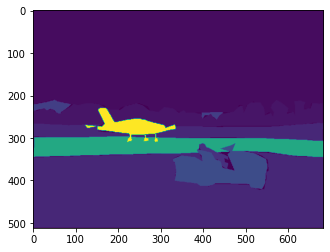

In [231]:
plt.imshow(im)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


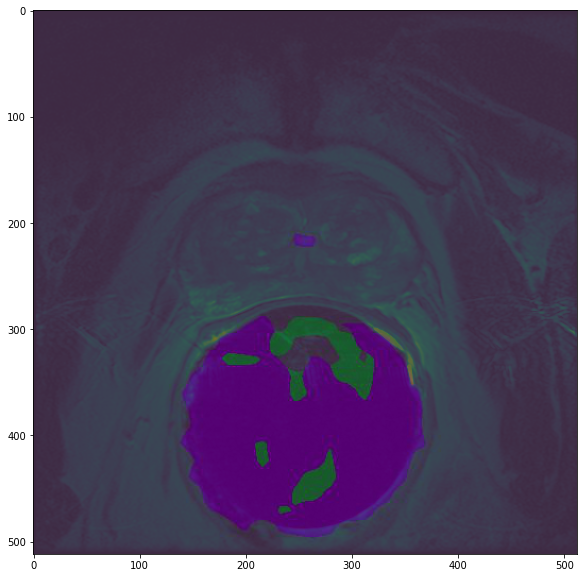

In [29]:
mri = load_mri('/data/ur/bukowy/LaViolette_Data/Prostates/1118/9/mri_slice_double_T2.nii')
plt.figure(figsize=(10,10))
plt.imshow(mri)
plt.imshow(plt.imread('./segm/output_segs/1118_9.jpg'), alpha=0.7)
plt.show()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


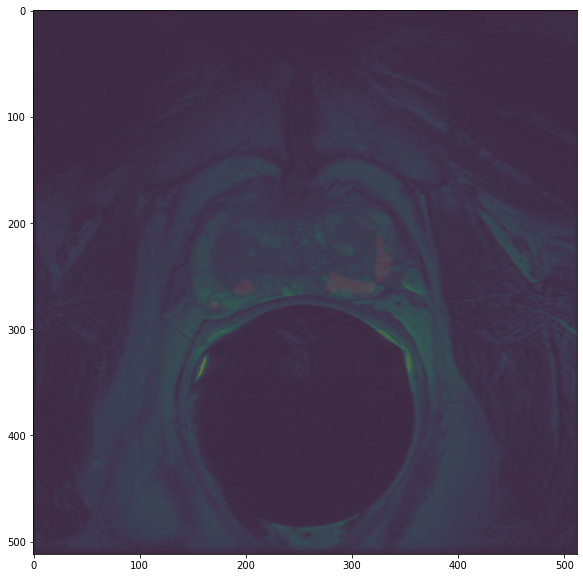

In [8]:
mri = load_mri('/data/ur/bukowy/LaViolette_Data/Prostates/1118/7/mri_slice_double_T2.nii')
plt.figure(figsize=(10,10))
plt.imshow(mri)
plt.imshow(plt.imread('./segm/output_segs/1118_7.jpg'), alpha=0.7)
plt.show()

## Data loader testing
---
---

In [3]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent) + '/mri_histology_toolkit')
sys.path.append(str(Path.cwd().parent) + '/homologous_point_prediction')

In [4]:
from homologous_point_prediction.data_processing.seg_data_loader import SegDataLoader

In [5]:
batch_size = 4
training_data_config = '/home/nelsonni/laviolette/homologous_point_prediction/homologous_point_prediction/data_processing/metadata/seg_train_config.json'
val_data_config = '/home/nelsonni/laviolette/homologous_point_prediction/homologous_point_prediction/data_processing/metadata/seg_validation_config.json'
data_loader = SegDataLoader(training_data_config, batch_size=batch_size)
data_loader_val = SegDataLoader(val_data_config, batch_size=1)

In [6]:
val_seg_gt = {}
for batch in data_loader:
   print(batch)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


skipping /data/ur/bukowy/LaViolette_Data/Prostates/1154/6
'NoneType' object has no attribute 'shape'
skipping /data/ur/bukowy/LaViolette_Data/Prostates/1142/5
'NoneType' object has no attribute 'shape'
Success: /data/ur/bukowy/LaViolette_Data/Prostates/1132/7
skipping /data/ur/bukowy/LaViolette_Data/Prostates/1158/15
'NoneType' object has no attribute 'shape'
1


In [7]:
data = data_loader[0]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


skipping /data/ur/bukowy/LaViolette_Data/Prostates/1154/6
'NoneType' object has no attribute 'shape'
skipping /data/ur/bukowy/LaViolette_Data/Prostates/1142/5
'NoneType' object has no attribute 'shape'
Success: /data/ur/bukowy/LaViolette_Data/Prostates/1132/7
skipping /data/ur/bukowy/LaViolette_Data/Prostates/1158/15
'NoneType' object has no attribute 'shape'


In [15]:
torch.unique(data[1])

tensor([0])

In [52]:
ims = [im for im in data[0]]

In [125]:
def load_histology(filepath):
    """Loads the histology as a grayscale 2D float32 array of range [0, 1]"""
    hist = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    if hist.shape[0] != 512 or hist.shape[1] != 512:
        hist = cv2.resize(hist, (512, 512), interpolation=cv2.INTER_AREA)
    if len(hist.shape) == 3:
        hist =  cv2.cvtColor(hist, cv2.COLOR_BGR2GRAY) # 2D uint8
    return (hist / 255.0).astype(np.float32)

In [236]:
seg_hist_file = '/data/ur/bukowy/LaViolette_Data/Prostates/1107/9/small_recon_8_label.tiff'
seg_file = '/data/ur/bukowy/LaViolette_Data/Prostates/1107/9/mri_seg_mask.tiff'
points_file = '/data/ur/bukowy/LaViolette_Data/Prostates/1107/9/histmri_controlPoints_small_recon_8_GT.csv'

In [223]:
points = pd.read_csv(points_file, header=None, engine='python').to_numpy().astype(int)
hist_points = np.flip(points[:, :2], axis=-1)
mri_points = np.flip(points[:, 2:], axis=-1)

In [231]:
seg = load_histology(seg_file)*255

In [239]:
# seg_file_name = 'mri_seg_mask.tiff'
# mri_file_name = 'mri_slice_double_T2.nii'

seg = load_histology(seg_file)
seg = np.clip((seg*255).astype(int) - 1, 0, None)
seg = torch.from_numpy(seg)


In [228]:
seg = load_histology(seg_hist_file)*255

In [235]:
np.unique(seg.astype(np.float32))

array([0.00000000e+00, 5.74448568e-05, 1.22549027e-04, 2.45098054e-04,
       3.67647066e-04, 3.67647095e-04, 4.90196107e-04, 6.12745120e-04,
       6.12745178e-04, 7.35294190e-04, 8.57843144e-04, 8.57843203e-04,
       9.80392215e-04, 1.10294123e-03, 1.22549024e-03, 1.22549036e-03,
       1.34803925e-03, 1.34803937e-03, 1.47058826e-03, 1.47058838e-03,
       1.59313728e-03, 1.59313739e-03, 1.71568641e-03, 1.83823542e-03,
       1.96078443e-03, 2.08333344e-03, 2.20588245e-03, 2.32843147e-03,
       2.45098048e-03, 2.45098071e-03, 2.57352949e-03, 2.57352972e-03,
       2.69607850e-03, 2.69607874e-03, 2.81862752e-03, 2.81862775e-03,
       2.94117653e-03, 2.94117676e-03, 3.06372554e-03, 3.06372577e-03,
       3.18627479e-03, 3.30882357e-03, 3.30882380e-03, 3.43137258e-03,
       3.43137281e-03, 3.55392182e-03, 3.67647083e-03, 3.79901985e-03,
       3.92156839e-03, 3.92156886e-03, 3.92156933e-03, 3.95986531e-03,
       3.97518417e-03, 3.99816222e-03, 4.03645867e-03, 4.04411787e-03,
      

In [220]:
image = warp_image_tps(seg.astype(np.float32), hist_points.astype(np.float32), mri_points.astype(np.float32), [512, 512], normalize_points=True)

(512, 512)
[0. 1. 2. 3. 5. 6. 7.]


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


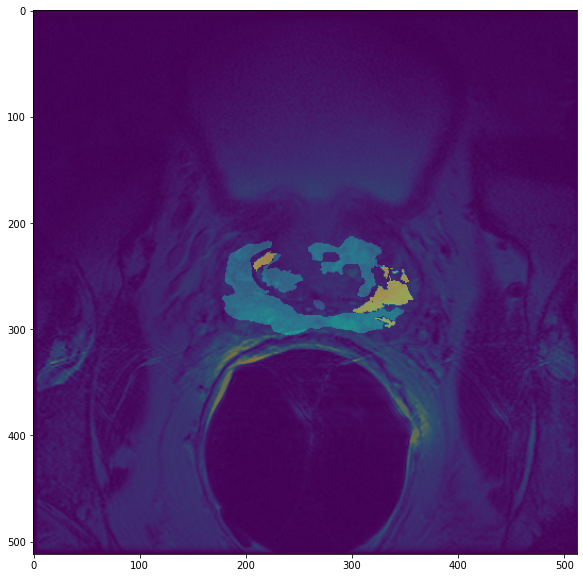

In [240]:
mri = load_mri('/data/ur/bukowy/LaViolette_Data/Prostates/1107/11/mri_slice_double_T2.nii')
plt.figure(figsize=(10,10))
plt.imshow(mri)
plt.imshow(seg, alpha=0.5)
plt.show()

In [187]:
np.unique(image)

array([0., 1., 2., 3., 5.], dtype=float32)

In [41]:
np.unique(seg*255)

array([0., 1., 2., 3., 5.], dtype=float32)

In [36]:
seg

7.689351e-05

In [4]:
total = 0
for (mri, seg) in data_loader_val:
    if seg:
        print(len(seg))
        total += len(seg)
print(total)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


set()
4


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


set()
4
8


In [201]:
# Source: https://github.com/cheind/py-thin-plate-spline
# Copyright 2018 Christoph Heindl.
#
# Licensed under MIT License
# ============================================================
from torch.nn.functional import grid_sample
import numpy as np
import torch
import cv2
import sys


class TPS:       
    @staticmethod
    def fit(c, lambd=0., reduced=False):        
        n = c.shape[0]

        U = TPS.u(TPS.d(c, c))
        K = U + np.eye(n, dtype=np.float32)*lambd

        P = np.ones((n, 3), dtype=np.float32)
        P[:, 1:] = c[:, :2]

        v = np.zeros(n+3, dtype=np.float32)
        v[:n] = c[:, -1]

        A = np.zeros((n+3, n+3), dtype=np.float32)
        A[:n, :n] = K
        A[:n, -3:] = P
        A[-3:, :n] = P.T

        determinant = np.linalg.det(A)
        theta = 0
        if determinant != 0:
            theta = np.linalg.solve(A, v) # p has structure w,a
        else:
            Apinv = np.linalg.pinv(A)
            theta = Apinv.dot(v)
        return theta[1:] if reduced else theta
        
    @staticmethod
    def d(a, b):
        return np.sqrt(np.square(a[:, None, :2] - b[None, :, :2]).sum(-1))

    @staticmethod
    def u(r):
        return r**2 * np.log(r + 1e-6)

    @staticmethod
    def z(x, c, theta):
        x = np.atleast_2d(x)
        U = TPS.u(TPS.d(x, c))
        w, a = theta[:-3], theta[-3:]
        reduced = theta.shape[0] == c.shape[0] + 2
        if reduced:
            w = np.concatenate((-np.sum(w, keepdims=True), w))
        b = np.dot(U, w)
        return a[0] + a[1]*x[:, 0] + a[2]*x[:, 1] + b

def uniform_grid(shape):
    '''Uniform grid coordinates.
    
    Params
    ------
    shape : tuple
        HxW defining the number of height and width dimension of the grid
    Returns
    -------
    points: HxWx2 tensor
        Grid coordinates over [0,1] normalized image range.
    '''

    H,W = shape[:2]    
    c = np.empty((H, W, 2))
    c[..., 0] = np.linspace(0, 1, W, dtype=np.float32)
    c[..., 1] = np.expand_dims(np.linspace(0, 1, H, dtype=np.float32), -1)

    return c
    
def tps_theta_from_points(c_src, c_dst, reduced=False):
    delta = c_src - c_dst
    
    cx = np.column_stack((c_dst, delta[:, 0]))
    cy = np.column_stack((c_dst, delta[:, 1]))
        
    theta_dx = TPS.fit(cx, reduced=reduced)
    theta_dy = TPS.fit(cy, reduced=reduced)

    return np.stack((theta_dx, theta_dy), -1)


def tps_grid(theta, c_dst, dshape):    
    ugrid = uniform_grid(dshape)

    reduced = c_dst.shape[0] + 2 == theta.shape[0]

    dx = TPS.z(ugrid.reshape((-1, 2)), c_dst, theta[:, 0]).reshape(dshape[:2])
    dy = TPS.z(ugrid.reshape((-1, 2)), c_dst, theta[:, 1]).reshape(dshape[:2])
    dgrid = np.stack((dx, dy), -1)

    grid = dgrid + ugrid
    
    return grid # H'xW'x2 grid[i,j] in range [0..1]

def tps_grid_to_remap(grid, sshape):
    '''Convert a dense grid to OpenCV's remap compatible maps.
    
    Params
    ------
    grid : HxWx2 array
        Normalized flow field coordinates as computed by compute_densegrid.
    sshape : tuple
        Height and width of source image in pixels.
    Returns
    -------
    mapx : HxW array
    mapy : HxW array
    '''

    mx = (grid[:, :, 0] * sshape[1]).astype(np.float32)
    my = (grid[:, :, 1] * sshape[0]).astype(np.float32)

    return mx, my

def warp_image_tps(img_src, pts_src, pts_dest, dest_shape, normalize_points=True):
    """
    Computes a TPS transform given control points and
    applies it to the moving image.
    img_src: ndarray representing pixels of input image
    pts_src: control points on the moving image
    pts_dest: control points on the static image
    dest_shape: shape of the destination image ndarray
    returns: transformed moving image
    """
    src_shape = img_src.shape
    print(src_shape)
    pts_src_norm = pts_src.copy()
    pts_dest_norm = pts_dest.copy()
    
    print(np.unique(img_src))
    
    # Normalize control points
    if normalize_points:
        pts_src_norm[:, 0] = pts_src_norm[:, 0] / src_shape[0]
        pts_dest_norm[:, 0] = pts_dest_norm[:, 0] / dest_shape[0]
        pts_src_norm[:, 1] = pts_src_norm[:, 1] / src_shape[1]
        pts_dest_norm[:, 1] = pts_dest_norm[:, 1] / dest_shape[1]
        
    # Compute parameters
    theta = tps_theta_from_points(pts_src_norm, pts_dest_norm)
    
    # Compute flow grid
    grid = tps_grid(theta, pts_dest_norm, dest_shape)
    remap = tps_grid_to_remap(grid, img_src.shape)
    
    warped = cv2.remap(img_src, remap[0], remap[1], cv2.INTER_NEAREST)
    return warped


def warp_points_tps(points, pts_src, pts_dest, src_shape, dest_shape, normalize_points=True):
    """
    Apply TPS transform to the provided points,
    based on the transform computed from control point pairs
    points: 2d points to transform
    pts_src: control points on the moving image
    pts_dest: control points on the static image
    dest_shape: shape of the destination image ndarray
    returns: transformed points
    """
    # Normalize control points
    pts_src_norm = pts_src.copy()
    pts_dest_norm = pts_dest.copy()
    if normalize_points:
        pts_src_norm[:, 0] = pts_src_norm[:, 0] / src_shape[0]
        pts_dest_norm[:, 0] = pts_dest_norm[:, 0] / dest_shape[0]
        pts_src_norm[:, 1] = pts_src_norm[:, 1] / src_shape[1]
        pts_dest_norm[:, 1] = pts_dest_norm[:, 1] / dest_shape[1]
    
    # Compute parameters
    theta = tps_theta_from_points(pts_src_norm, pts_dest_norm)

    # Compute flow grid
    grid = tps_grid(theta, pts_dest_norm, dest_shape)
    remap = tps_grid_to_remap(grid, src_shape)

    # Look up transformed points from grid
    dists = np.sqrt((remap[0][:, :, np.newaxis] - points[:, 0])**2 + (remap[1][:, :, np.newaxis] - points[:, 1])**2)
    flatdists = dists.reshape(-1, points.shape[0])
    idx = np.unravel_index(np.argmin(flatdists, axis=0), remap[0].shape)
    transformed_points = np.stack((idx[1], idx[0]), axis=1)

    return transformed_points


def warp_image_prosregnet(img_src, params, dest_shape, control_points=None, grid_size=6):
    """
    Computes control points from ProsRegNet TPS parameters
    and applies TPS to the moving image from these points
    img_src: ndarray representing pixels of input image
    params: ProsRegNet-generated TPS control points on the destination image
    dest_shape: shape of the destination image ndarray
    returns: transformed moving image
    """
    # Reorder into points
    params = np.stack((params[:36], params[36:]), axis=1)
    
    grid_spacing = 2.0/(grid_size-1)
    x = np.arange(-1.0, 1.001, grid_spacing)
    mesh = np.meshgrid(x, x)
    pts_src = np.stack((mesh[0].ravel(), mesh[1].ravel()), axis=1)
    pts_dest = params

    # Flip and squash from (-1,1) to (0, 1)
    pts_src = pts_src * -1
    pts_dest = pts_dest * -1
    pts_src = (pts_src + 1) / 2
    pts_dest = (pts_dest + 1) / 2
    return control_point_tps(img_src, pts_src, pts_dest, dest_shape, normalize_points=False)

In [109]:
cv2.__version__

'3.4.1'

In [5]:
bad = ['1136', '1141', '1140', '1152', '1126', '1111', '1191', '1106', '1129', '1144', '1190', '1113', '1123', '1134', '1133', '1158', '1128', '1125', '1108', '1107', '1147', '1159', '1131', '1142', '1132', '1121', '1154', '1124', '1155', '1149', '1138']
neu = ["1104", "1105", "1106", "1107", "1108", "1111", "1113", "1121", "1128", "1129", "1131", "1132", "1123", "1133", "1134", "1136", "1124", "1125", "1126", "1138", "1128", "1138", "1140", "1141", "1142", "1144", "1147", "1149", "1152", "1154", "1155", "1158", "1159", "1185", "1187", "1190", "1191", "1203"]

In [11]:
# as = []
for x in neu:
    if x not in bad:
#         as.append(x)
        print(x)
        
print('z')

1104
1105
1185
1187
1203
z


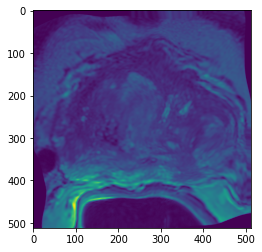

In [49]:
plt.imshow(moving_images[3].squeeze())